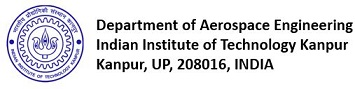

#### Name    : **Arush Raju Chinchkhede**
#### Roll No.: **220212**

## Review Exercise on Optimization OPT01

###  Purpose of this worksheet is to experiment with Code Implementing Gradient Descent and its Variants

**Note:** *The codes used for this learning exploration are from the book Math for Deep Learning (2021) by Ronald T Knuesel (RTK) (ISBN-13:978-1-7185-0191-1, No Starch Publications, USA and accessible from https://github.com/rkneusela9.MathForDeepLearning/ and also the errata page at https://nostartch.com/math-deep-learning While you can use this for initial experiments you are encouraged to implement these in other platforms such as Tensorflow/Keras/PyTorch as per your choice.*

*The codes from the above resource and reproduced in this worksheet basically implement the plain-vanilla gradient descent (GD) and momentum accelerated GD or MAGD for funtions of a single variable (1D) and functions of 2 variables (2D).*


### Exercises with 1D Gradient Descent and Variants

##### TASK 1: 
(a) The function used in the 1D codes is $f(x)=6x^2-12x+3$\
You are expected to use different functions and watch GD and MAGD in action for your functions. If possible modify the codes to implement animation of GD and MAGD steps from initial guess to the minimum point of interest \(b) Implement the Nestrov Assisted Gradient Descent (NAGD) for the functions of your choice and compare and comment on the three approaches- GD, MAGD and NAGD. Plot the variation of the function value vs number of iterations for the optimization.


### 1D Gradient Descent 

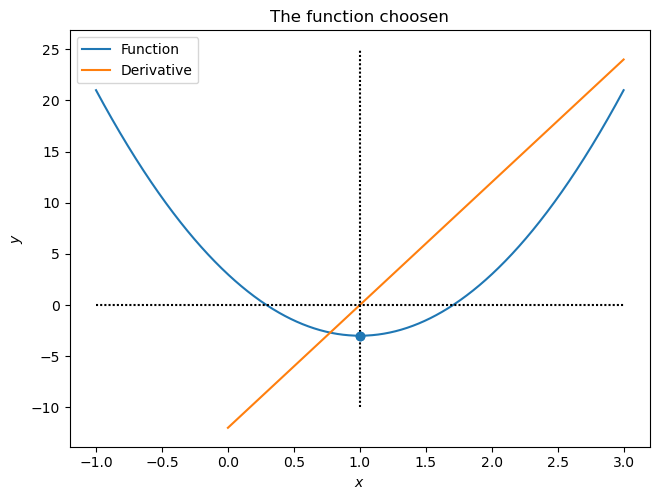

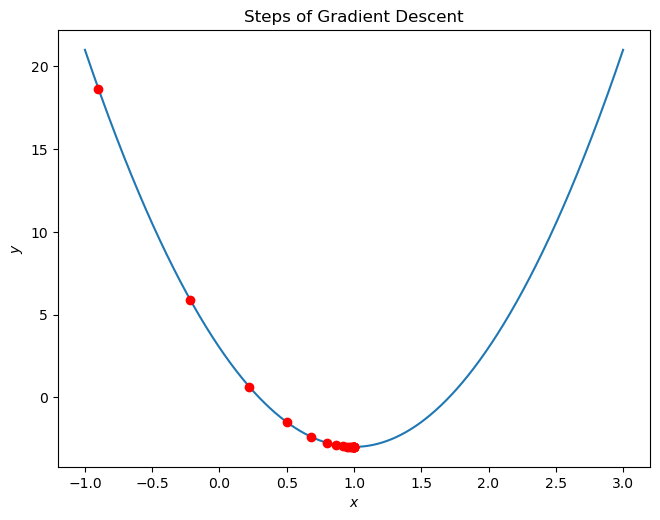

Minimum at (0.999747, -3.000000)


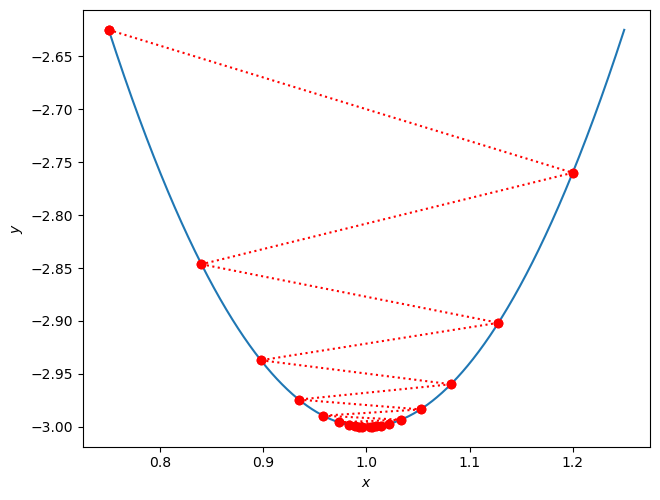

In [1]:
#
#  file:  gd_1d.py
#
#  1D example of GD
#
#  RTK, 14-Feb-2021
#  Last update:  14-Feb-2021
#
################################################################

import sys
import os
import numpy as np
import matplotlib.pylab as plt

# To define the number of steps, use this variable
n = 20

#  The function and its derivative
def f(x):
    return 6*x**2 - 12*x + 3

def d(x):
    return 12*x - 12


#  Show the function, derivative, and minimum
x = np.linspace(-1,3,1000)
y = f(x)
plt.plot(x,y,color='#1f77b4')
x = np.linspace(0,3,10)
z = d(x)
plt.plot(x,z,color='#ff7f0e')
plt.plot([-1,3],[0,0],linestyle=(0,(1,1)),color='k')
plt.plot([1,1],[-10,25],linestyle=(0,(1,1)),color='k')
plt.plot([1,1],[f(1),f(1)],marker='o',color='#1f77b4')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("The function choosen")
plt.legend(["Function","Derivative"])
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.savefig("gd_1d_plot.png", dpi=300)
plt.show()
plt.close()

#  Show a series of gradient descent steps
x = np.linspace(-1,3,1000)
plt.plot(x,f(x))

x = -0.9
eta = 0.03 # Learning rate
for i in range(n):
    plt.plot(x, f(x), marker='o', color='r')
    x = x - eta * d(x)

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.savefig("gd_1d_steps.png", dpi=300)
plt.title("Steps of Gradient Descent")
plt.show()
plt.close()
print("Minimum at (%0.6f, %0.6f)" % (x, f(x)))

#  Show oscillation if step size too large
x = np.linspace(0.75,1.25,1000)
plt.plot(x,f(x))
x = xold = 0.75
eta = 0.15
for i in range(n):
    plt.plot([xold,x], [f(xold),f(x)], marker='o', linestyle='dotted', color='r')
    xold = x
    x = x - eta * d(x)

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.savefig("gd_1d_oscillating.png", dpi=300)
plt.show()

### Comments
In the above code we see that the performance Gradient descent algorithm actually depends on the **Learning rate**. In the second figure the learning rate is small leading to stable descent on the function. Whereas the algorithm jumps from one side to the other in the third figure indicating bigger steps that is, higher learning rate.

Due to some problem I was unable to animate the steps. Apologies to skip this part of the ReX03.

### 1D Momentum Assisted Gradient Descent 

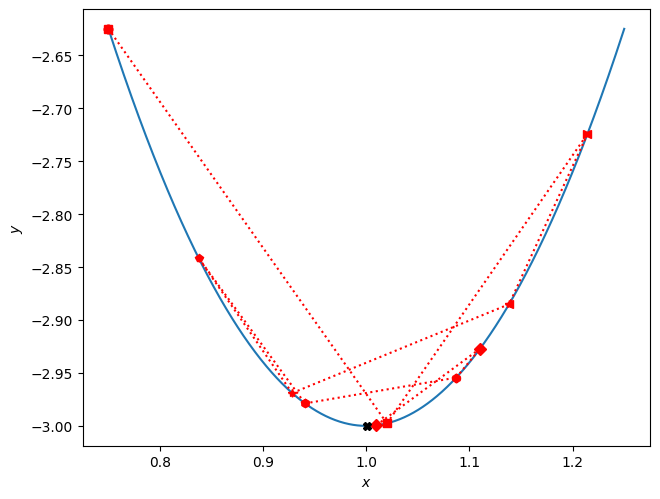

In [1]:
#
#  file:  gd_1d_momentum.py
#
#  1D example of GD
#
#  RTK, 14-Feb-2021
#  Last update:  14-Feb-2021
#
################################################################

import sys
import os
import numpy as np
import matplotlib.pylab as plt

#  The function and its derivative
def f(x):
    return 6*x**2 - 12*x + 3

def d(x):
    return 12*x - 12

m = ['o','s','>','<','*','+','p','h','P','D']
x = np.linspace(0.75,1.25,1000)
plt.plot(x,f(x))
x = xold = 0.75
eta = 0.09
mu = 0.8
v = 0.0
for i in range(10):
    plt.plot([xold,x], [f(xold),f(x)], marker=m[i], linestyle='dotted', color='r')
    xold = x
    v = mu*v - eta * d(x)
    x = x + v
for i in range(40):
    v = mu*v - eta * d(x)
    x = x + v
plt.plot(x,f(x),marker='X', color='k')

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.savefig("gd_1d_momentum.png", dpi=300)
plt.show()

In [ ]:
#You may add a code animating the steps here to show the effect of the 
#the momentum restriction factor and the step size on the route to the target

### Nestrov gradient descent

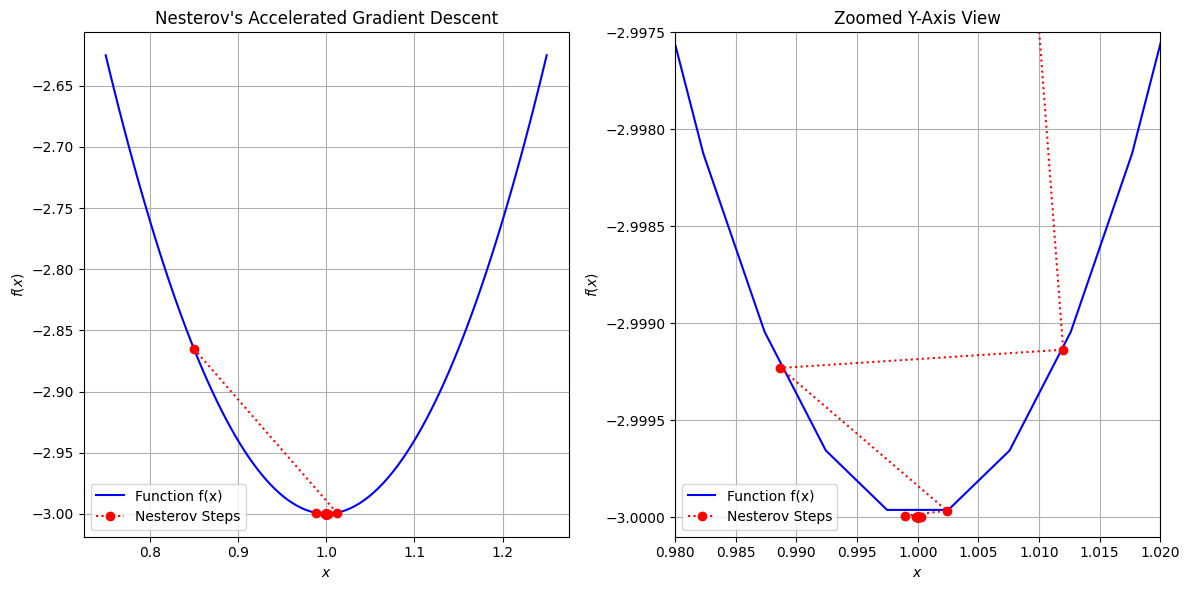

the first value of x is  0.85
the second value of x is  1.012


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    return 6*x**2 - 12*x + 3

def d(x):
    return 12*x - 12

# Parameters
eta = 0.09  # Learning rate
mu = 0.8    # Momentum factor
x = 0.85    # Initial position
v = 0.0     # Initial velocity

# Data for plotting
x_values = [x]  # Start with the initial value
y_values = [f(x)]  # Function value at the initial x

# Perform Nesterov's Accelerated Gradient Descent
for i in range(100):
    # Nesterov's lookahead step
    x_prev = x + mu * v
    v = mu * v - eta * d(x_prev)  # Update velocity
    x += v  # Update position
    
    # Record values for plotting
    x_values.append(x)
    y_values.append(f(x))

# Plotting the function and the path taken by gradient descent
x_range = np.linspace(0.75, 1.25, 100)
plt.figure(figsize=(12, 6))

# Original plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(x_range, f(x_range), label='Function f(x)', color='blue')
plt.plot(x_values, y_values, color='red', linestyle='dotted', marker='o', label='Nesterov Steps')  # Dotted line
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Nesterov's Accelerated Gradient Descent")
plt.legend()
plt.grid()

# Zoomed y-axis plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(x_range, f(x_range), label='Function f(x)', color='blue')
plt.plot(x_values, y_values, color='red', linestyle='dotted', marker='o', label='Nesterov Steps')  # Dotted line
plt.xlim(0.98, 1.02)  # Same x limits
plt.ylim(-3.0001, -2.9975)       # Adjust y limits for zoom effect
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Zoomed Y-Axis View")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

print("the first value of x is ",x_values[0])
print("the second value of x is ",x_values[1])

### Comment
Seeing at the figure we could see that the nesterov's method is clearly the most effective of the other two gradient descent algorithm. The sudden jump from the intial value of $$x = 0.85$$ to $$x = 1.012$$ And this approximation is very accurate compared to momentum and vanilla gradient descent.

### Comparing the results of all the gradient descent

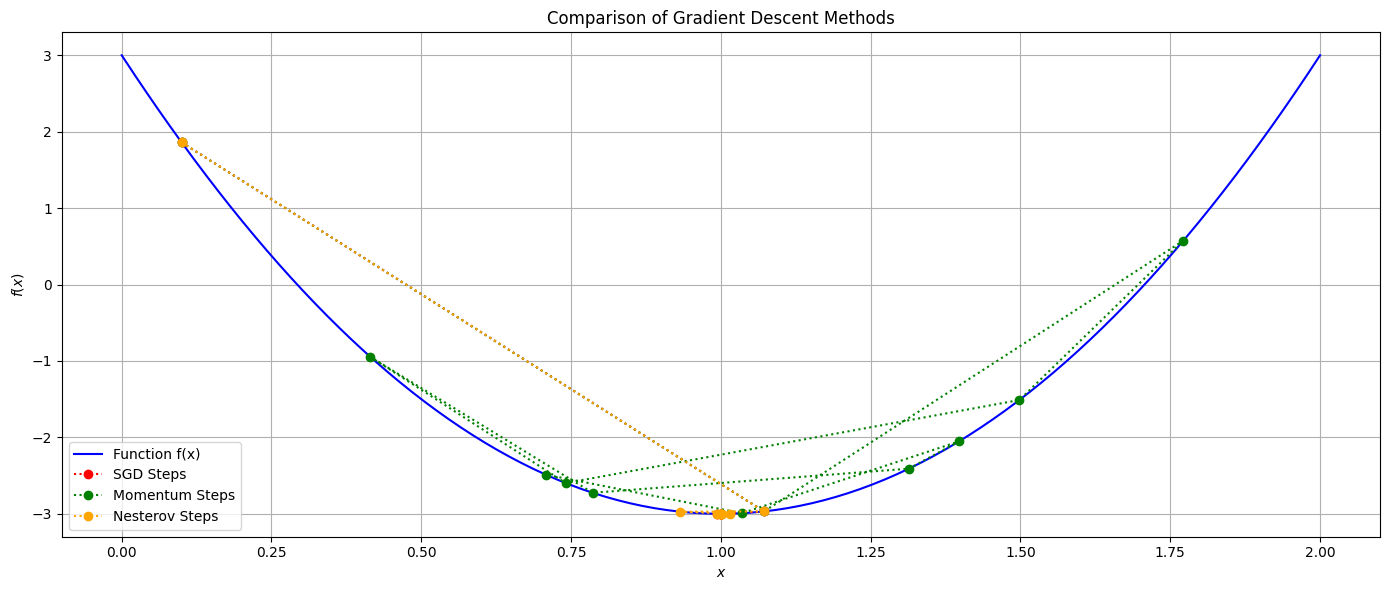

In [34]:
#Compare performance of all three SD, MAGD and NAGD here.
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    return 6 * x**2 - 12 * x + 3

def d(x):
    return 12 * x - 12

# Gradient Descent Parameters
eta = 0.09  # Learning rate
mu = 0.8    # Momentum factor
initial_x = 0.1
num_iterations = 10

# Function to perform Standard Gradient Descent
def gradient_descent(x, eta, iterations):
    x_values = [x]
    for _ in range(iterations):
        x -= eta * d(x)  # Update x
        x_values.append(x)
    return x_values

# Function to perform Momentum Gradient Descent
def momentum_gradient_descent(x, eta, mu, iterations):
    v = 0.0
    x_values = [x]
    for _ in range(iterations):
        v = mu * v - eta * d(x)  # Update velocity
        x += v  # Update x
        x_values.append(x)
    return x_values

# Function to perform Nesterov Accelerated Gradient Descent
def nesterov_gradient_descent(x, eta, mu, iterations):
    v = 0.0
    x_values = [x]
    for _ in range(iterations):
        x_prev = x + mu * v  # Lookahead step
        v = mu * v - eta * d(x_prev)  # Update velocity
        x += v  # Update x
        x_values.append(x)
    return x_values

# Run all three methods

x_initial = initial_x
nesterov_values = nesterov_gradient_descent(x_initial, eta, mu, num_iterations)
sgd_values = gradient_descent(x_initial, eta, num_iterations)
#momentum_values = momentum_gradient_descent(x_initial, eta, mu, num_iterations)


# Plotting
x_range = np.linspace(0, 2, 100)
plt.figure(figsize=(14, 6))

# Original function
plt.plot(x_range, f(x_range), label='Function f(x)', color='blue')

# Plot each method
plt.plot(sgd_values, f(np.array(sgd_values)), color='red', marker='o', linestyle='dotted', label='SGD Steps')
plt.plot(momentum_values, f(np.array(momentum_values)), color='green', marker='o', linestyle='dotted', label='Momentum Steps')
plt.plot(nesterov_values, f(np.array(nesterov_values)), color='orange', marker='o', linestyle='dotted', label='Nesterov Steps')

# Labels and Legend
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Comparison of Gradient Descent Methods")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


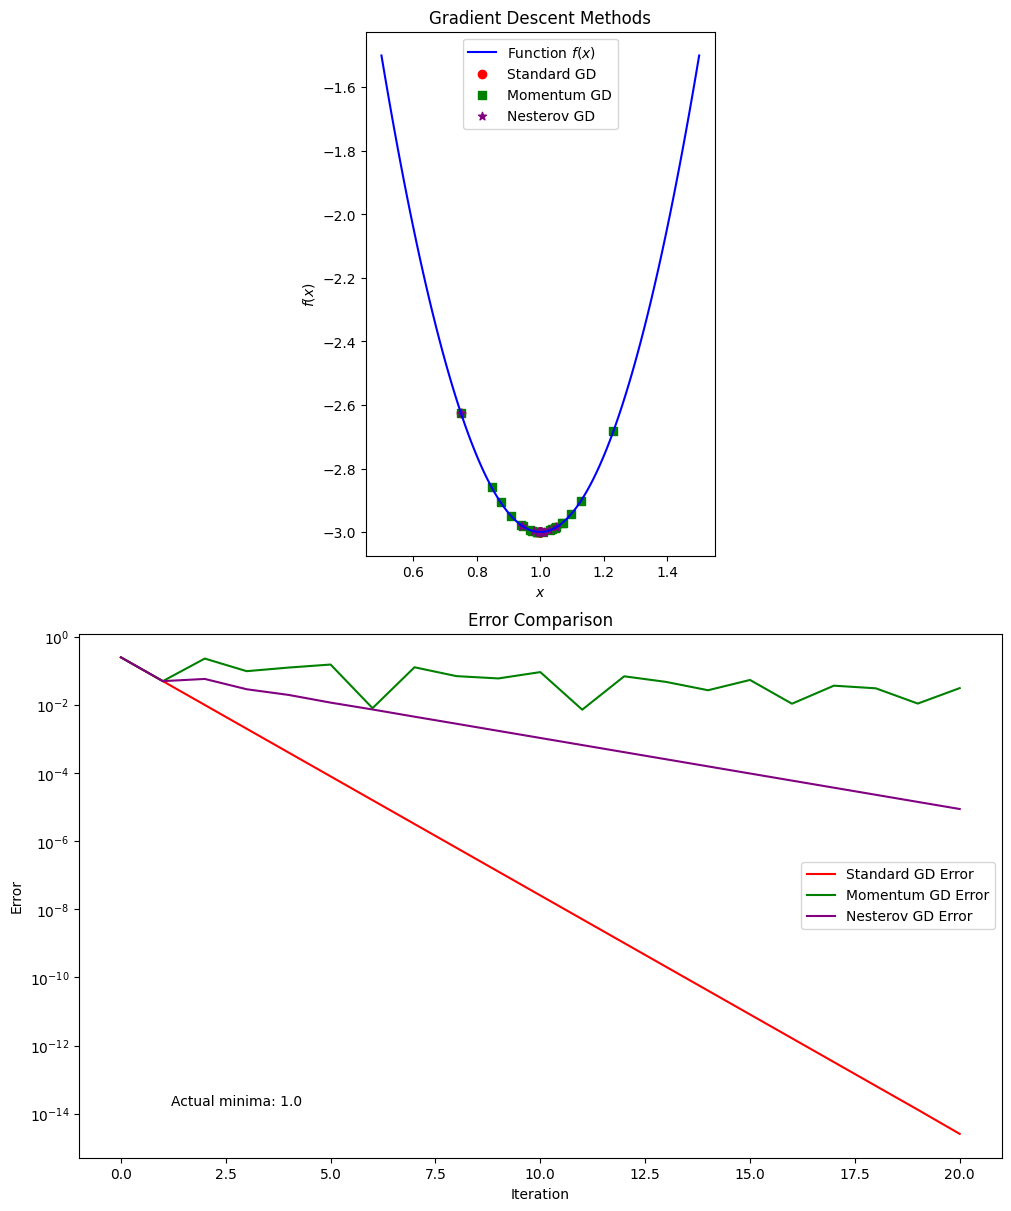

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Function and its derivative
def f(x):
    return 6*x**2 - 12*x + 3

def d(x):
    return 12*x - 12

# Actual minimum value
actual_minima = 1.0

# Initialize parameters for the three methods
eta = 0.1  # Learning rate
mu = 0.8   # Momentum term
num_iterations = 20  # Number of iterations
x_init_values = [0.75, 0.75, 0.75]  # Starting points for the three methods

# Store x values for each method
x_nesterov = x_init_values[0]
x_momentum = x_init_values[1]
x_standard = x_init_values[2]

# Lists to store values for plotting
x_standard_list = [x_standard]
x_momentum_list = [x_momentum]
x_nesterov_list = [x_nesterov]

# Standard Gradient Descent
for i in range(num_iterations):
    x_standard -= eta * d(x_standard)
    x_standard_list.append(x_standard)

# Momentum Gradient Descent
v_momentum = 0
for i in range(num_iterations):
    v_momentum = mu * v_momentum - eta * d(x_momentum)
    x_momentum += v_momentum
    x_momentum_list.append(x_momentum)

# Nesterov Accelerated Gradient Descent
v_nesterov = 0
for i in range(num_iterations):
    x_nesterov_temp = x_nesterov + mu * v_nesterov
    v_nesterov = mu * v_nesterov - eta * d(x_nesterov_temp)
    x_nesterov += v_nesterov
    x_nesterov_list.append(x_nesterov)

# Prepare x values for plotting
x = np.linspace(0.5, 1.5, 100)

# Create the plots
fig, axs = plt.subplots(2, 1, figsize=(10, 12), constrained_layout=True)

# Plot for all three methods
axs[0].plot(x, f(x), label='Function $f(x)$', color='blue')
axs[0].scatter(x_standard_list, f(np.array(x_standard_list)), color='red', label='Standard GD', marker='o')
axs[0].scatter(x_momentum_list, f(np.array(x_momentum_list)), color='green', label='Momentum GD', marker='s')
axs[0].scatter(x_nesterov_list, f(np.array(x_nesterov_list)), color='purple', label='Nesterov GD', marker='*')

axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$f(x)$")
axs[0].set_title("Gradient Descent Methods")
axs[0].legend()
axs[0].set_aspect('equal', adjustable='box')  # Set aspect ratio to 1:1

# Error calculation
errors_standard = np.abs(np.array(x_standard_list) - actual_minima)
errors_momentum = np.abs(np.array(x_momentum_list) - actual_minima)
errors_nesterov = np.abs(np.array(x_nesterov_list) - actual_minima)

# Plot errors
axs[1].plot(errors_standard, label='Standard GD Error', color='red')
axs[1].plot(errors_momentum, label='Momentum GD Error', color='green')
axs[1].plot(errors_nesterov, label='Nesterov GD Error', color='purple')

axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("Error")
axs[1].set_title("Error Comparison")
axs[1].legend()
axs[1].set_yscale('log')  

axs[1].text(0.1, 0.1, f'Actual minima: {actual_minima}', transform=axs[1].transAxes)

plt.show()


#### TASK 2: 
(a) The function used in the 1D codes is  $𝑓(𝑥)=6𝑥^2+9y^2-12𝑥-14y+3$\
You are expected to use different functions and watch GD and MAGD in action for your functions. Experiment with different starting locations to assess their influence on the route to the target.If possible modify the codes to implement animation of GD and MAGD steps from initial guess to the minimum point of interest (b) Implement the Nestrov Assisted Gradient Descent (NAGD) for the functions of your choice and compare and comment on the three approaches- GD, MAGD and NAGD.Plot the variation of the function value vs number of iterations for the optimization.

## 2D Gradient Descent 

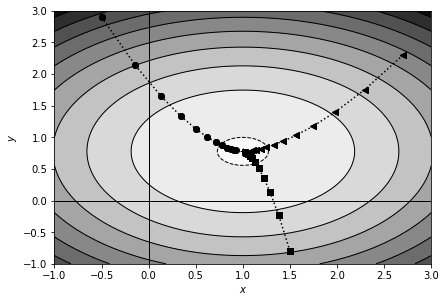

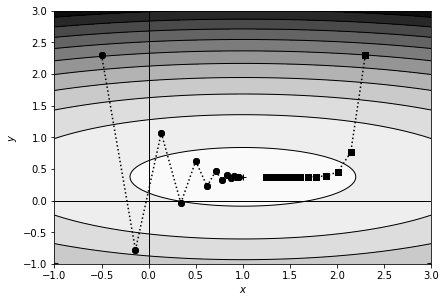

In [3]:
#
#  file:  gd_2d.py
#
#  2D example of gradient descent
#
#  RTK, 14-Feb-2021
#  Last update:  14-Feb-2021
#
################################################################

import numpy as np
import matplotlib.pylab as plt

#  Function and partial derivatives
def f(x,y):
    return 6*x**2 + 9*y**2 - 12*x - 14*y + 3

def dx(x):
    return 12*x - 12

def dy(y):
    return 18*y - 14

#  Gradient descent steps
N = 100
x,y = np.meshgrid(np.linspace(-1,3,N), np.linspace(-1,3,N))
z = f(x,y)
plt.contourf(x,y,z,10, cmap="Greys")
plt.contour(x,y,z,10, colors='k', linewidths=1)
plt.plot([0,0],[-1,3],color='k',linewidth=1)
plt.plot([-1,3],[0,0],color='k',linewidth=1)
plt.plot(1,0.7777778,color='k',marker='+')

x = xold = -0.5
y = yold = 2.9
for i in range(12):
    plt.plot([xold,x],[yold,y], marker='o', linestyle='dotted', color='k')
    xold = x
    yold = y
    x = x - 0.02 * dx(x)
    y = y - 0.02 * dy(y)

x = xold = 1.5
y = yold = -0.8
for i in range(12):
    plt.plot([xold,x],[yold,y], marker='s', linestyle='dotted', color='k')
    xold = x
    yold = y
    x = x - 0.02 * dx(x)
    y = y - 0.02 * dy(y)

x = xold = 2.7
y = yold = 2.3
for i in range(12):
    plt.plot([xold,x],[yold,y], marker='<', linestyle='dotted', color='k')
    xold = x
    yold = y
    x = x - 0.02 * dx(x)
    y = y - 0.02 * dy(y)

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.savefig("gd_2d_steps.png", dpi=300)
plt.show()
plt.close()

#  New function and partial derivatives
def f(x,y):
    return 6*x**2 + 40*y**2 - 12*x - 30*y + 3

def dx(x):
    return 12*x - 12

def dy(y):
    return 80*y - 30

#  Large stepsize
N = 100
x,y = np.meshgrid(np.linspace(-1,3,N), np.linspace(-1,3,N))
z = f(x,y)
plt.contourf(x,y,z,10, cmap="Greys")
plt.contour(x,y,z,10, colors='k', linewidths=1)
plt.plot([0,0],[-1,3],color='k',linewidth=1)
plt.plot([-1,3],[0,0],color='k',linewidth=1)
plt.plot(1,0.375,color='k',marker='+')

x = xold = -0.5
y = yold = 2.3
for i in range(14):
    plt.plot([xold,x],[yold,y], marker='o', linestyle='dotted', color='k')
    xold = x
    yold = y
    x = x - 0.02 * dx(x)
    y = y - 0.02 * dy(y)

x = xold = 2.3
y = yold = 2.3
for i in range(14):
    plt.plot([xold,x],[yold,y], marker='s', linestyle='dotted', color='k')
    xold = x
    yold = y
    x = x - 0.01 * dx(x)
    y = y - 0.01 * dy(y)

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.savefig("gd_2d_oscillating.png", dpi=300)
plt.show()
plt.close()

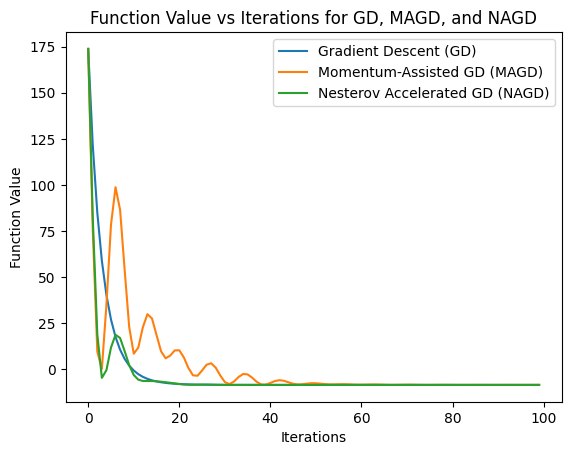

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def f(x, y):
    return 6*x**2 + 9*y**2 - 12*x - 14*y + 3

def grad_f(x, y):
    df_dx = 12*x - 12
    df_dy = 18*y - 14
    return np.array([df_dx, df_dy])

# Gradient Descent (GD)
def gradient_descent(grad_f, start, learning_rate=0.01, max_iter=100):
    x, y = start
    values = []
    for i in range(max_iter):
        grad = grad_f(x, y)
        x -= learning_rate * grad[0]
        y -= learning_rate * grad[1]
        values.append(f(x, y))
    return values

# Momentum-Assisted Gradient Descent (MAGD)
def momentum_gd(grad_f, start, learning_rate=0.01, beta=0.9, max_iter=100):
    x, y = start
    values = []
    v_x, v_y = 0, 0
    for i in range(max_iter):
        grad = grad_f(x, y)
        v_x = beta * v_x + learning_rate * grad[0]
        v_y = beta * v_y + learning_rate * grad[1]
        x -= v_x
        y -= v_y
        values.append(f(x, y))
    return values

# Nesterov Accelerated Gradient Descent (NAGD)
def nesterov_gd(grad_f, start, learning_rate=0.01, beta=0.9, max_iter=100):
    x, y = start
    values = []
    v_x, v_y = 0, 0
    for i in range(max_iter):
        # Look-ahead step
        x_lookahead = x - beta * v_x
        y_lookahead = y - beta * v_y
        grad = grad_f(x_lookahead, y_lookahead)
        v_x = beta * v_x + learning_rate * grad[0]
        v_y = beta * v_y + learning_rate * grad[1]
        x -= v_x
        y -= v_y
        values.append(f(x, y))
    return values

# Parameters
start_point = (5.0, 5.0)  # Initial starting point (x0, y0)
learning_rate = 0.01
max_iterations = 100
beta = 0.9

# Run Gradient Descent, Momentum Gradient Descent, and Nesterov GD
values_gd = gradient_descent(grad_f, start_point, learning_rate, max_iterations)
values_mgd = momentum_gd(grad_f, start_point, learning_rate, beta, max_iterations)
values_nagd = nesterov_gd(grad_f, start_point, learning_rate, beta, max_iterations)

# Plotting the results
plt.plot(values_gd, label='Gradient Descent (GD)')
plt.plot(values_mgd, label='Momentum-Assisted GD (MAGD)')
plt.plot(values_nagd, label='Nesterov Accelerated GD (NAGD)')
plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.title('Function Value vs Iterations for GD, MAGD, and NAGD')
plt.legend()
plt.show()


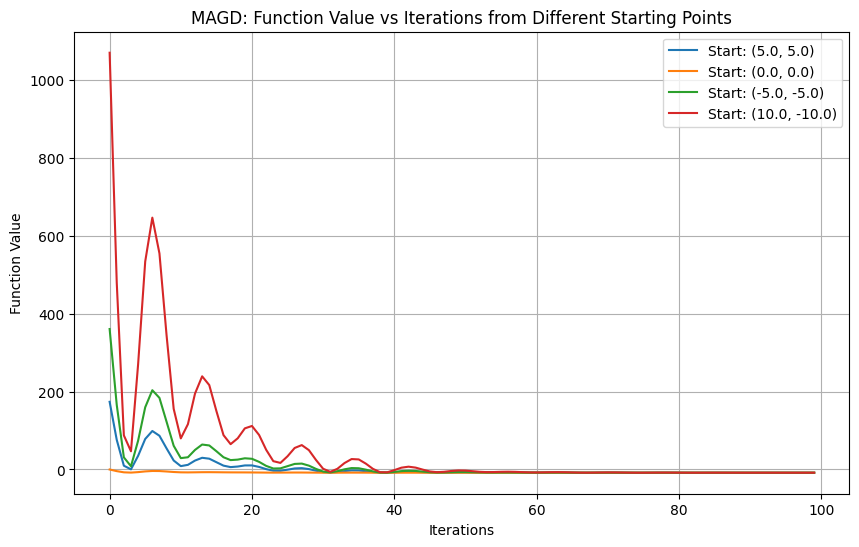

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def f(x, y):
    return 6*x**2 + 9*y**2 - 12*x - 14*y + 3

def grad_f(x, y):
    df_dx = 12*x - 12
    df_dy = 18*y - 14
    return np.array([df_dx, df_dy])

# Momentum-Assisted Gradient Descent (MAGD)
def momentum_gd(grad_f, start, learning_rate=0.01, beta=0.9, max_iter=100):
    x, y = start
    values = []
    v_x, v_y = 0, 0
    for i in range(max_iter):
        grad = grad_f(x, y)
        v_x = beta * v_x + learning_rate * grad[0]
        v_y = beta * v_y + learning_rate * grad[1]
        x -= v_x
        y -= v_y
        values.append(f(x, y))
    return values

# Parameters
learning_rate = 0.01
max_iterations = 100
beta = 0.9

# Different starting points
starting_points = [(5.0, 5.0), (0.0, 0.0), (-5.0, -5.0), (10.0, -10.0)]

# Run Momentum Gradient Descent from different starting points
results = {}
for start_point in starting_points:
    values_mgd = momentum_gd(grad_f, start_point, learning_rate, beta, max_iterations)
    results[start_point] = values_mgd

# Plotting the results for different starting points
plt.figure(figsize=(10, 6))
for start_point, values_mgd in results.items():
    plt.plot(values_mgd, label=f'Start: {start_point}')
    
plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.title('MAGD: Function Value vs Iterations from Different Starting Points')
plt.legend()
plt.grid(True)
plt.show()


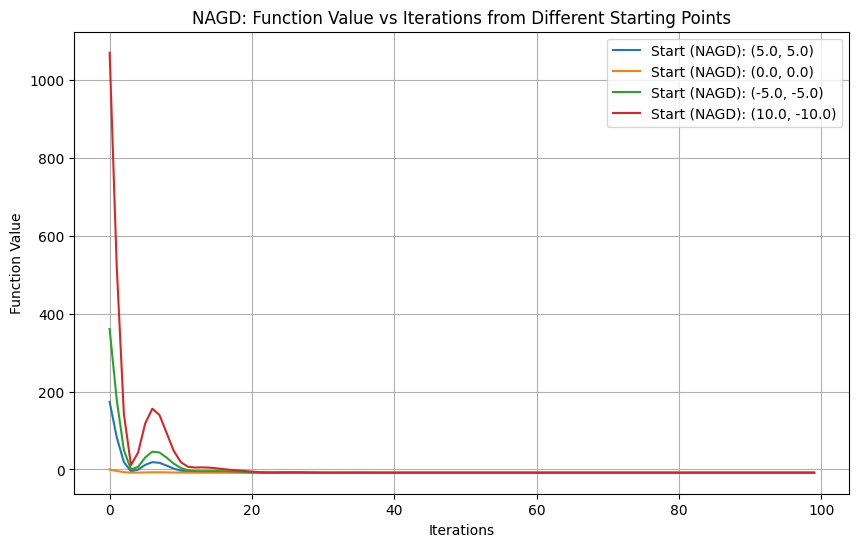

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def f(x, y):
    return 6*x**2 + 9*y**2 - 12*x - 14*y + 3

def grad_f(x, y):
    df_dx = 12*x - 12
    df_dy = 18*y - 14
    return np.array([df_dx, df_dy])

# Momentum-Assisted Gradient Descent (MAGD)
def momentum_gd(grad_f, start, learning_rate=0.01, beta=0.9, max_iter=100):
    x, y = start
    values = []
    v_x, v_y = 0, 0
    for i in range(max_iter):
        grad = grad_f(x, y)
        v_x = beta * v_x + learning_rate * grad[0]
        v_y = beta * v_y + learning_rate * grad[1]
        x -= v_x
        y -= v_y
        values.append(f(x, y))
    return values

# Nesterov Accelerated Gradient Descent (NAGD)
def nesterov_gd(grad_f, start, learning_rate=0.01, beta=0.9, max_iter=100):
    x, y = start
    values = []
    v_x, v_y = 0, 0
    for i in range(max_iter):
        # Look-ahead step
        x_lookahead = x - beta * v_x
        y_lookahead = y - beta * v_y
        grad = grad_f(x_lookahead, y_lookahead)
        v_x = beta * v_x + learning_rate * grad[0]
        v_y = beta * v_y + learning_rate * grad[1]
        x -= v_x
        y -= v_y
        values.append(f(x, y))
    return values

# Parameters
learning_rate = 0.01
max_iterations = 100
beta = 0.9

# Different starting points
starting_points = [(5.0, 5.0), (0.0, 0.0), (-5.0, -5.0), (10.0, -10.0)]

# Run Nesterov Gradient Descent from different starting points
results_nagd = {}
for start_point in starting_points:
    values_nagd = nesterov_gd(grad_f, start_point, learning_rate, beta, max_iterations)
    results_nagd[start_point] = values_nagd

# Plotting the results for NAGD from different starting points
plt.figure(figsize=(10, 6))
for start_point, values_nagd in results_nagd.items():
    plt.plot(values_nagd, label=f'Start (NAGD): {start_point}')
    
plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.title('NAGD: Function Value vs Iterations from Different Starting Points')
plt.legend()
plt.grid(True)
plt.show()


### 2D Momentum Assisted Gradient Descent 

#### TASK 3
The function used in this 2D MAGD code and in SD and NAGD code is a composed of two inverted Gaussians. You could create your own functions using the tool https://c3d.libretexts.org/CalcPlot3D/index.html and experiment with the code and assess the results via your comments. (a) Use all these codes to assess the effects of different starting locations and the parameters restricting the momentum and memory of previous time steps for both MAGD and NAGD on the approach to the target for your functions of choice and also plot the variation of the function value vs number of iterations for the optimization. (b) If possible animate the route to the target by comparing all three methods.

(x,y) = (0.88071575, -0.90631918)
(x,y) = (-0.94963246, 0.98092072)


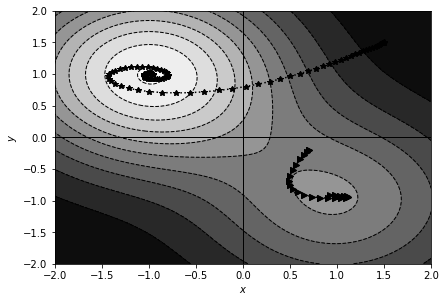

In [4]:
#
#  file:  gd_momentum.py
#
#  2D example of gradient descent for a function
#  with more than one minimum with momentum
#
#  RTK, 14-Feb-2021
#  Last update:  21-Feb-2021
#
################################################################

import numpy as np
import matplotlib.pylab as plt

#  Function and partial derivatives
def f(x,y):
    return -2*np.exp(-0.5*((x+1)**2+(y-1)**2)) +  \
           -np.exp(-0.5*((x-1)**2+(y+1)**2))

def dx(x,y):
    return 2*(x+1)*np.exp(-0.5*((x+1)**2+(y-1)**2)) +  \
           (x-1)*np.exp(-0.5*((x-1)**2+(y+1)**2))

def dy(x,y):
    return (y+1)*np.exp(-0.5*((x-1)**2+(y+1)**2)) +  \
           2*(y-1)*np.exp(-0.5*((x+1)**2+(y-1)**2))

#  Gradient descent steps
N = 100
x,y = np.meshgrid(np.linspace(-2,2,N), np.linspace(-2,2,N))
z = f(x,y)
plt.contourf(x,y,z,10, cmap="Greys")
plt.contour(x,y,z,10, colors='k', linewidths=1)
plt.plot([0,0],[-2,2],color='k',linewidth=1)
plt.plot([-2,2],[0,0],color='k',linewidth=1)

def gd(x,y, eta,mu, steps, marker):
    xold = x
    yold = y
    vx = vy = 0.0
    for i in range(steps):
        plt.plot([xold,x],[yold,y], marker=marker, linestyle='dotted', color='k')
        xold = x
        yold = y
        vx = mu*vx - eta * dx(x,y)
        vy = mu*vy - eta * dy(x,y)
        x = x + vx
        y = y + vy

    return x,y


#gd(-1.5, 1.2,20, 'o')
#gd( 1.5,-1.8,40, 's')
#gd( 0.0, 0.0,30, '<')
print("(x,y) = (%0.8f, %0.8f)" % gd( 0.7,-0.2, 0.1,  0.9, 25, '>'))
print("(x,y) = (%0.8f, %0.8f)" % gd( 1.5, 1.5, 0.02, 0.9, 90, '*'))

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.savefig("gd_momentum_steps.png", dpi=300)
plt.show()
plt.close()

### Gradient Descent in 2D for Function with more than one Minima

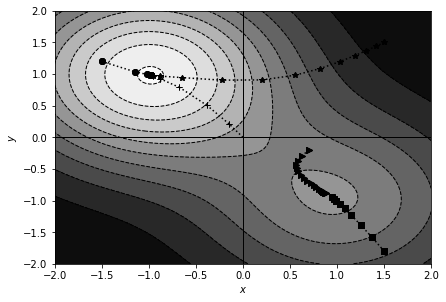

In [5]:
#
#  file:  gd_multiple.py
#
#  2D example of gradient descent for a function
#  with more than one minimum
#
#  RTK, 14-Feb-2021
#  Last update:  14-Feb-2021
#
################################################################

import numpy as np
import matplotlib.pylab as plt

#  Function and partial derivatives
def f(x,y):
    return -2*np.exp(-0.5*((x+1)**2+(y-1)**2)) +  \
           -np.exp(-0.5*((x-1)**2+(y+1)**2))

def dx(x,y):
    return 2*(x+1)*np.exp(-0.5*((x+1)**2+(y-1)**2)) +  \
           (x-1)*np.exp(-0.5*((x-1)**2+(y+1)**2))

def dy(x,y):
    return (y+1)*np.exp(-0.5*((x-1)**2+(y+1)**2)) +  \
           2*(y-1)*np.exp(-0.5*((x+1)**2+(y-1)**2))

#  Gradient descent steps
N = 100
x,y = np.meshgrid(np.linspace(-2,2,N), np.linspace(-2,2,N))
z = f(x,y)
plt.contourf(x,y,z,10, cmap="Greys")
plt.contour(x,y,z,10, colors='k', linewidths=1)
plt.plot([0,0],[-2,2],color='k',linewidth=1)
plt.plot([-2,2],[0,0],color='k',linewidth=1)

eta = 0.4

x = xold = -1.5
y = yold = 1.2
for i in range(9):
    plt.plot([xold,x],[yold,y], marker='o', linestyle='dotted', color='k')
    xold = x
    yold = y
    x = x - eta * dx(x,y)
    y = y - eta * dy(x,y)

x = xold = 1.5
y = yold = -1.8
for i in range(9):
    plt.plot([xold,x],[yold,y], marker='s', linestyle='dotted', color='k')
    xold = x
    yold = y
    x = x - eta * dx(x,y)
    y = y - eta * dy(x,y)

x = xold = 0.0
y = yold = 0.0
for i in range(20):
    plt.plot([xold,x],[yold,y], marker='+', linestyle='dotted', color='k')
    xold = x
    yold = y
    x = x - eta * dx(x,y)
    y = y - eta * dy(x,y)

x = xold = 0.7
y = yold = -0.2
for i in range(20):
    plt.plot([xold,x],[yold,y], marker='>', linestyle='dotted', color='k')
    xold = x
    yold = y
    x = x - eta * dx(x,y)
    y = y - eta * dy(x,y)

x = xold = 1.5
y = yold = 1.5
for i in range(30):
    plt.plot([xold,x],[yold,y], marker='*', linestyle='dotted', color='k')
    xold = x
    yold = y
    x = x - eta * dx(x,y)
    y = y - eta * dy(x,y)

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.savefig("gd_multiple_steps.png", dpi=300)
plt.show()
plt.close()

### Gradient Descent with Nesterov Momentum for Function with more than one Minima

(x,y) = (0.91282356, -0.91808458)
(x,y) = (-0.97180660, 0.98133744)


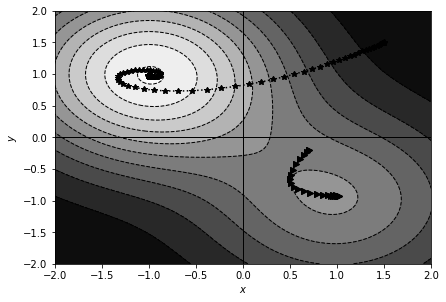

In [6]:
#
#  file:  gd_nesterov.py
#
#  2D example of gradient descent for a function
#  with more than one minimum and Nesterov momentum
#
#  RTK, 14-Feb-2021
#  Last update:  21-Feb-2021
#
################################################################

import numpy as np
import matplotlib.pylab as plt

#  Function and partial derivatives
def f(x,y):
    return -2*np.exp(-0.5*((x+1)**2+(y-1)**2)) +  \
           -np.exp(-0.5*((x-1)**2+(y+1)**2))

def dx(x,y):
    return 2*(x+1)*np.exp(-0.5*((x+1)**2+(y-1)**2)) +  \
           (x-1)*np.exp(-0.5*((x-1)**2+(y+1)**2))

def dy(x,y):
    return (y+1)*np.exp(-0.5*((x-1)**2+(y+1)**2)) +  \
           2*(y-1)*np.exp(-0.5*((x+1)**2+(y-1)**2))

#  Gradient descent steps
N = 100
x,y = np.meshgrid(np.linspace(-2,2,N), np.linspace(-2,2,N))
z = f(x,y)
plt.contourf(x,y,z,10, cmap="Greys")
plt.contour(x,y,z,10, colors='k', linewidths=1)
plt.plot([0,0],[-2,2],color='k',linewidth=1)
plt.plot([-2,2],[0,0],color='k',linewidth=1)

def gd(x,y, eta,mu, steps, marker):
    xold = x
    yold = y
    vx = vy = 0.0
    for i in range(steps):
        plt.plot([xold,x],[yold,y], marker=marker, linestyle='dotted', color='k')
        xold = x
        yold = y
        vx = mu*vx - eta * dx(x+mu*vx,y)
        vy = mu*vy - eta * dy(x,y+mu*vy)
        x = x + vx
        y = y + vy

    return x,y

#gd(-1.5, 1.2,20, 'o')
#gd( 1.5,-1.8,40, 's')
#gd( 0.0, 0.0,30, '<')
print("(x,y) = (%0.8f, %0.8f)" % gd( 0.7,-0.2, 0.1,  0.9, 25, '>'))
print("(x,y) = (%0.8f, %0.8f)" % gd( 1.5, 1.5, 0.02, 0.9, 90, '*'))

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.savefig("gd_nesterov_steps.png", dpi=300)
plt.show()
plt.close()

#### TASK 4

For all the functions used in your exercises implement the variants of the adaptive gradient descent methods (a) RMSProp (b) AdaGrad and (c) ADAM by modifying the codes used in this exercise. Compare and comment on the differences between all these adaptive gradient methods with SD, MAGD and NAGD methods used in this work. As these methods are available in TensorFlow, Keras and PyTorch you are to compare the outputs from your modified codes with that from TensorFlow, Keras and PyTorch.Plot the variation of the function value vs number of iterations for the optimization.

C:\Users\Arush Chinchkhede\AppData\Local\Temp\ipykernel_19696\3544146071.py:6: RuntimeWarning: overflow encountered in scalar multiply
  return 6*x**2 + 9*y**2 - 12*x - 14*y + 3
C:\Users\Arush Chinchkhede\AppData\Local\Temp\ipykernel_19696\3544146071.py:6: RuntimeWarning: overflow encountered in scalar power
  return 6*x**2 + 9*y**2 - 12*x - 14*y + 3
C:\Users\Arush Chinchkhede\AppData\Local\Temp\ipykernel_19696\3544146071.py:74: RuntimeWarning: invalid value encountered in sqrt
  x -= learning_rate * grad[0] / (np.sqrt(cache_x) + epsilon)
C:\Users\Arush Chinchkhede\AppData\Local\Temp\ipykernel_19696\3544146071.py:75: RuntimeWarning: invalid value encountered in sqrt
  y -= learning_rate * grad[1] / (np.sqrt(cache_y) + epsilon)


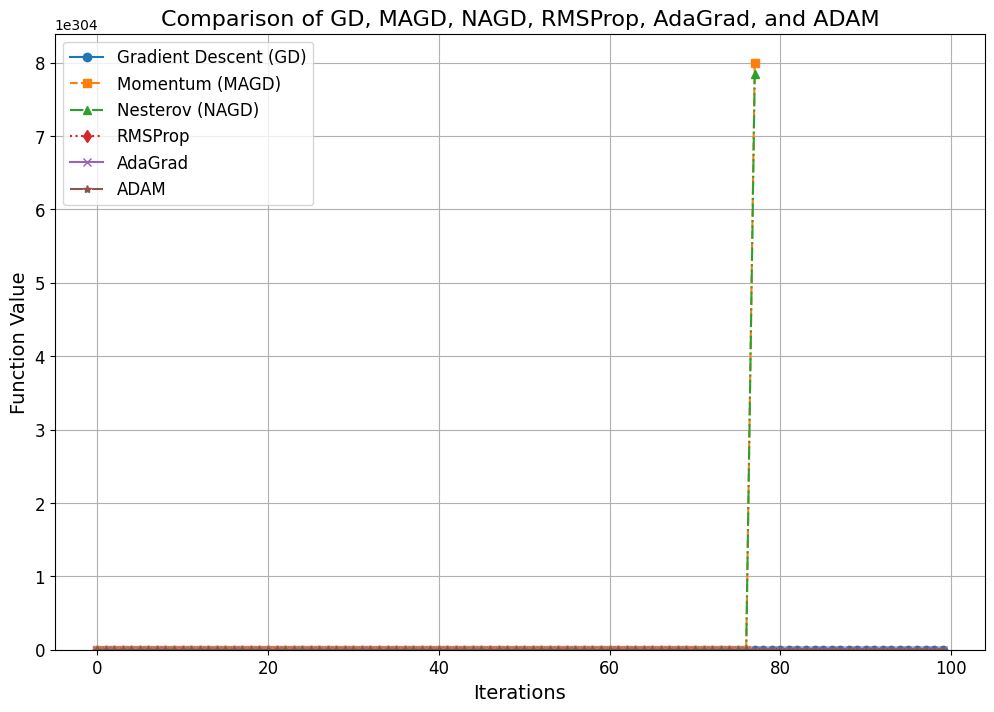

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def f(x, y):
    return 6*x**2 + 9*y**2 - 12*x - 14*y + 3

def grad_f(x, y):
    df_dx = 12*x - 12
    df_dy = 18*y - 14
    return np.array([df_dx, df_dy])

# Function to clip gradients
def clip_gradients(grad, clip_value=1.0):
    norm = np.linalg.norm(grad)
    if norm > clip_value:
        return grad * clip_value / norm
    return grad

# Standard Gradient Descent (GD)
def gd(grad_f, start, learning_rate=0.01, max_iter=100):
    x, y = start
    values = []
    for i in range(max_iter):
        grad = grad_f(x, y)
        grad = clip_gradients(grad)  # Apply gradient clipping
        x -= learning_rate * grad[0]
        y -= learning_rate * grad[1]
        values.append(f(x, y))
    return values

# Momentum-Assisted Gradient Descent (MAGD)
def momentum_gd(grad_f, start, learning_rate=0.01, beta=0.9, max_iter=100):
    x, y = start
    values = []
    v_x, v_y = 0, 0
    for i in range(max_iter):
        grad = grad_f(x, y)
        grad = clip_gradients(grad)  # Apply gradient clipping
        v_x = beta * v_x + learning_rate * grad[0]
        v_y = beta * v_y + learning_rate * grad[1]
        x -= v_x
        y -= v_y
        values.append(f(x, y))
    return values

# Nesterov Accelerated Gradient Descent (NAGD)
def nesterov_gd(grad_f, start, learning_rate=0.01, beta=0.9, max_iter=100):
    x, y = start
    values = []
    v_x, v_y = 0, 0
    for i in range(max_iter):
        x_lookahead = x - beta * v_x
        y_lookahead = y - beta * v_y
        grad = grad_f(x_lookahead, y_lookahead)
        grad = clip_gradients(grad)  # Apply gradient clipping
        v_x = beta * v_x + learning_rate * grad[0]
        v_y = beta * v_y + learning_rate * grad[1]
        x -= v_x
        y -= v_y
        values.append(f(x, y))
    return values

# RMSProp
def rmsprop(grad_f, start, learning_rate=0.01, beta=0.9, epsilon=1e-8, max_iter=100):
    x, y = start
    values = []
    cache_x, cache_y = 0, 0
    for i in range(max_iter):
        grad = grad_f(x, y)
        grad = clip_gradients(grad)  # Apply gradient clipping
        cache_x = beta * cache_x + (1 - beta) * grad[0]**2
        cache_y = beta * cache_y + (1 - beta) * grad[1]**2
        x -= learning_rate * grad[0] / (np.sqrt(cache_x) + epsilon)
        y -= learning_rate * grad[1] / (np.sqrt(cache_y) + epsilon)
        values.append(f(x, y))
    return values

# AdaGrad
def adagrad(grad_f, start, learning_rate=0.01, epsilon=1e-8, max_iter=100):
    x, y = start
    values = []
    cache_x, cache_y = 0, 0
    for i in range(max_iter):
        grad = grad_f(x, y)
        grad = clip_gradients(grad)  # Apply gradient clipping
        cache_x += grad[0]**2
        cache_y += grad[1]**2
        x -= learning_rate * grad[0] / (np.sqrt(cache_x) + epsilon)
        y -= learning_rate * grad[1] / (np.sqrt(cache_y) + epsilon)
        values.append(f(x, y))
    return values

# ADAM (Adaptive Moment Estimation)
def adam(grad_f, start, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=100):
    x, y = start
    values = []
    m_x, v_x = 0, 0
    m_y, v_y = 0, 0
    for t in range(1, max_iter + 1):
        grad = grad_f(x, y)
        grad = clip_gradients(grad)  # Apply gradient clipping
        m_x = beta1 * m_x + (1 - beta1) * grad[0]
        m_y = beta1 * m_y + (1 - beta1) * grad[1]
        v_x = beta2 * v_x + (1 - beta2) * grad[0]**2
        v_y = beta2 * v_y + (1 - beta2) * grad[1]**2

        m_x_corr = m_x / (1 - beta1**t)
        m_y_corr = m_y / (1 - beta1**t)
        v_x_corr = v_x / (1 - beta2**t)
        v_y_corr = v_y / (1 - beta2**t)

        x -= learning_rate * m_x_corr / (np.sqrt(v_x_corr) + epsilon)
        y -= learning_rate * m_y_corr / (np.sqrt(v_y_corr) + epsilon)

        values.append(f(x, y))
    return values

# Parameters
learning_rate = 0.01
max_iterations = 100

# Different starting points (smaller initial values)
start_point = (0.1, 0.1)

# Running all algorithms from a single starting point
results_gd = gd(grad_f, start_point, learning_rate, max_iterations)
results_magd = momentum_gd(grad_f, start_point, learning_rate, max_iterations)
results_nagd = nesterov_gd(grad_f, start_point, learning_rate, max_iterations)
results_rmsprop = rmsprop(grad_f, start_point, learning_rate, max_iterations)
results_adagrad = adagrad(grad_f, start_point, learning_rate, max_iterations)
results_adam = adam(grad_f, start_point, learning_rate, max_iterations)

# Plotting the results
plt.figure(figsize=(12, 8))  # Increase figure size
plt.plot(results_gd, label='Gradient Descent (GD)', marker='o', linestyle='-')
plt.plot(results_magd, label='Momentum (MAGD)', marker='s', linestyle='--')
plt.plot(results_nagd, label='Nesterov (NAGD)', marker='^', linestyle='-.')
plt.plot(results_rmsprop, label='RMSProp', marker='d', linestyle=':')
plt.plot(results_adagrad, label='AdaGrad', marker='x', linestyle='-')
plt.plot(results_adam, label='ADAM', marker='*', linestyle='-.')

plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Function Value', fontsize=14)
plt.title('Comparison of GD, MAGD, NAGD, RMSProp, AdaGrad, and ADAM', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.ylim(bottom=0)  # Set lower limit for y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

